In [1]:
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as img
import keras
import math

11490434/11490434 [==============================] - 0s 0us/step


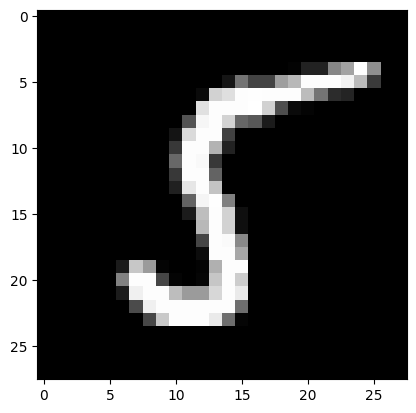

In [2]:
from keras.datasets import mnist
(x_train, y_train),(x_test, y_test) = keras.datasets.mnist.load_data()
idx=np.random.randint(0,60000)
image=x_train[idx]
plt.imshow(image, cmap='gray')

In [3]:
def erosion(image,mask):
    eroded_image=np.zeros_like(image)
    row_pad=mask.shape[0]//2
    col_pad=mask.shape[1]//2
    padded_image=np.pad(image,((row_pad,row_pad),(col_pad,col_pad)))
    kernel_mask=(mask==1)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            sub_array = padded_image[i:i + mask.shape[0], j:j + mask.shape[1]]
            if np.all(sub_array[kernel_mask]):
                eroded_image[i, j] = 1
    return eroded_image

In [4]:
def dilation(image, mask):
  row_pad = mask.shape[0]//2
  col_pad = mask.shape[1]//2
  dilated_img = np.zeros(image.shape)
  padded_img = np.pad(image, ((row_pad, row_pad), (col_pad, col_pad)))
  kernel = (mask==1)
  for i in range(image.shape[0]):
    for j in range(image.shape[1]):
      sub_array = padded_img[i:i+mask.shape[0], j:j+mask.shape[1]]
      if(np.any(sub_array[kernel])):
        dilated_img[i,j] = 1
  return dilated_img



In [5]:
def opening(image,mask):
    return dilation(erosion(image,mask),mask)

def closing(image, mask):
  return erosion(dilation(image, mask), mask)

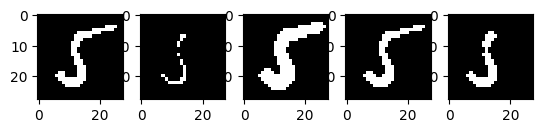

In [6]:
figure, axis = plt.subplots(1,5)

binary_image = np.where(image>128, 1,0)

eroded_img = erosion(binary_image, np.array([[0,1,0],[1,1,1],[0,1,0]]))
axis[1].imshow(eroded_img, cmap='gray')
dilated_img = dilation(binary_image,  np.array([[0,1,0],[1,1,1],[0,1,0]]))
axis[2].imshow(dilated_img, cmap='gray')
close=closing(binary_image, np.array([[0,1,0],[1,1,1],[0,1,0]]))
axis[3].imshow(close, cmap='gray')
open = opening(binary_image, np.array([[0,1,0],[1,1,1],[0,1,0]]))
axis[4].imshow(open, cmap='gray')
axis[0].imshow(binary_image, cmap='gray')
plt.show()

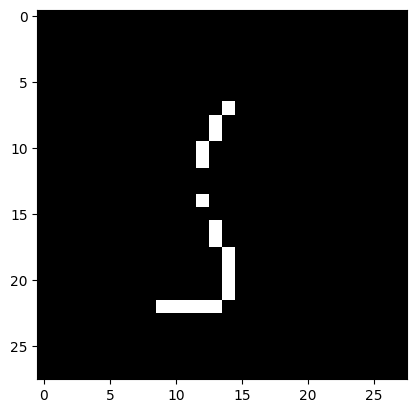

In [7]:
def hmt(image, b1, b2):
  image_c = np.where(image==0, 1, 0)
  hmt = np.bitwise_and(erosion(image, b1), erosion(image_c, b2))
  return hmt

hmt = hmt(binary_image, np.array([[1,1,1],[0,1,0],[0,1,0]]),np.array([[0,0,0],[0,0,-1],[0,0,-1]]))
plt.imshow(hmt, cmap='gray')